<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Samuelson’s-Model" data-toc-modified-id="Samuelson’s-Model-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Samuelson’s Model</a></span></li></ul></li><li><span><a href="#General-version-of-the-model" data-toc-modified-id="General-version-of-the-model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>General version of the model</a></span></li><li><span><a href="#Direct-problem" data-toc-modified-id="Direct-problem-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Direct problem</a></span><ul class="toc-item"><li><span><a href="#Sample-plots" data-toc-modified-id="Sample-plots-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Sample plots</a></span></li><li><span><a href="#What-is-an-impulse-response-function?" data-toc-modified-id="What-is-an-impulse-response-function?-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>What is an impulse response function?</a></span></li></ul></li><li><span><a href="#Government-Spending" data-toc-modified-id="Government-Spending-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Government Spending</a></span></li></ul></div>

<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Samuelson Model

Most of this lecture material came from the [Samuelson Multiplier-Accelerator lecture](https://python.quantecon.org/samuelson.html) from QuantEcon.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Samuelson’s Model

Samuelson used a *second-order linear difference equation* to
represent a model of national output based on three components:

- a *national output identity* asserting that national outcome is the sum of consumption plus investment plus government purchases.  
- a Keynesian *consumption function* asserting that consumption at time $ t $ is equal to a constant times national output at time $ t-1 $.  
- an investment *accelerator* asserting that investment at time $ t $ equals a constant called the *accelerator coefficient* times the difference in output between period $ t-1 $ and $ t-2 $.
- the idea that consumption plus investment plus government purchases constitute *aggregate demand,* which automatically calls forth an equal amount of *aggregate supply*.

Samuelson used the model to analyze how particular values of the marginal propensity to consume and the accelerator coefficient might give rise to transient *business cycles* in national output.

Possible dynamic properties include

- smooth convergence to a constant level of output  
- damped business cycles that eventually converge to a constant level of output  
- persistent business cycles that neither dampen nor explode  


Later we present an extension that adds a random shock to the right side of the national income identity representing random fluctuations in aggregate demand.

This modification makes national output become governed by a second-order *stochastic linear difference equation* that, with appropriate parameter values, gives rise to recurrent irregular business cycles.

## General version of the model

Let’s assume that

- $ \{C_t\} $ is a sequence of levels of aggregate consumption expenditures 
- $ \{I_t\} $ is a sequence of rates of investment
- $ \{G_t\} $ is a sequence of levels of government expenditures 
- $ \{Y_t\} $ is a sequence of levels of national income
- $ \{\epsilon_{t}\} $ is an IID sequence standard normal random variables.

The parameters of the model are

- $ a \in (0, 1) $ is the marginal propensity to consume in the Keynesian consumption function $ C_t = a Y_{t-1} + \gamma $.  
- $ b > 0 $ is the “accelerator coefficient” in the “investment accelerator” $ I_t = b (Y_{t-1} - Y_{t-2}) $.  
- $ \sigma \geq 0 $ is a “volatility” parameter — setting $ \sigma = 0 $ recovers the non-stochastic case that we’ll start with.  

The model combines the consumption function

<a id='equation-consumption'></a>
$$
C_t = a Y_{t-1} + \gamma \tag{1}
$$

with the investment accelerator

<a id='equation-accelerator'></a>
$$
I_t = b (Y_{t-1} - Y_{t-2}) \tag{2}
$$

and the national income identity

<a id='equation-income-identity'></a>
$$
Y_t = C_t + I_t + G_t + \sigma \epsilon_t \tag{3}
$$

**Important aspects of these equations**

- The parameter $ a $ is people's *marginal propensity to consume* out of income - equation [(1)](#equation-consumption) asserts that people consume a fraction of of each additional dollar of income.  
- The parameter $ b > 0 $ is the investment accelerator coefficient - equation [(2)](#equation-accelerator) asserts that people invest in physical capital when income is increasing and disinvest when it is decreasing.  

**Combining equations**

Equations [(1)](#equation-consumption), [(2)](#equation-accelerator), and [(3)](#equation-income-identity) imply the following second-order linear difference equation for national income:

$$
Y_t = (a+b) Y_{t-1} - b Y_{t-2} + (\gamma + G_t) + \sigma \epsilon_t
$$

We can write this as a "standard" second order difference equation:

<a id='equation-second-order'></a>
$$
Y_t = \rho_1 Y_{t-1} + \rho_2 Y_{t-2} + (\gamma + G_t) + \sigma \epsilon_t \tag{4}
$$

where $ \rho_1 = (a+b) $ and $ \rho_2 = -b $.

To complete the model, we require two **initial conditions**.

If the model is to generate time series for $ t=0, \ldots, T $, we
require initial values

$$
Y_{-1} = \bar Y_{-1}, \quad  Y_{-2} = \bar Y_{-2}
$$

We’ll ordinarily set the parameters $ (a,b) $ so that starting from an arbitrary pair of initial conditions $ (\bar Y_{-1}, \bar Y_{-2}) $, national income $ Y_t $ converges to a constant value as $ t $ becomes large.

We are interested in studying

- the transient fluctuations in $ Y_t $ as it converges to its **steady state** level
- the effects that a random shock can have on the economy

## Direct problem

We will now write code that allows us to draw sequences of outcomes for the variables in our model.

In [2]:
class Samuelson(object):
    """
    This class represents the Samuelson model, otherwise known as the
    multiple-accelerator model. The model combines the Keynesian
    multiplier with the accelerator theory of investment.

    The path of output is governed by a linear second-order difference equation

    .. math::

        Y_t = (\gamma + G_t) + (a + b) Y_{t-1} - b Y_{t-2} + \sigma \epsilon_t

    Parameters
    ----------
    a : scalar
        Marginal propensity to consume
    b : scalar
        Accelerator coefficient
    γ : scalar
        The constant amount of consumption
    σ : scalar
        Volatility parameter. It must be greater than or equal to 0. Set
        equal to 0 for a non-stochastic model.

    """

    def __init__(self, a=0.7, b=0.2, γ=10.0, σ=0):

        self.a, self.b, self.γ = a, b, γ
        self.σ = σ
        self.ρ1 = a + b
        self.ρ2 = -b

    @property
    def roots(self):
        return np.roots([1.0, -self.ρ1, -self.ρ2])

    def Y_ss(self, G):
        γ, ρ1, ρ2 = self.γ, self.ρ1, self.ρ2
        return (γ + G) / (1 - ρ1 - ρ2)

    def behavior(self):
        ρ1, ρ2 = self.ρ1, self.ρ2
        discriminant = ρ1**2 + 4*ρ2

        if discriminant == 0:
            print("Single real root")
        elif discriminant > 0:
            print("Two real roots")
        else:
            print("Two complex roots")
        
        if all(np.abs(self.roots) < 1.0-1e-8):
            print("Absolute values are less than one")
        elif all(np.abs(self.roots) < 1.0+1e-8):
            print("Absolute values are equal to one")
        else:
            print("Absolute values are not less than or equal one")

    def _transition(self, ytm1, ytm2, Gt, ϵt):
        "One step transition"
        ρ1, ρ2, γ, σ = self.ρ1, self.ρ2, self.γ, self.σ
        return (γ + Gt) + ρ1*ytm1 + ρ2*ytm2 + σ*ϵt

    def _simulate(self, y0m1, y0m2, G, ε, T):
        "Internal simulation method used for irf and simulate"
        # Unpack parameters
        a, b, γ, σ = self.a, self.b, self.γ, self.σ

        # Make sure that G is an array
        if np.isscalar(G):
            G = np.ones(T)*G

        # Allocate space -- Use -1 and -2 to "wrap" y values
        c = np.zeros(T)
        i = np.zeros(T)
        y = np.zeros(T)
        y[-1] = y0m1
        y[-2] = y0m2
        
        for t in range(T):
            c[t] = γ + a*y[t-1]
            i[t] = b * (y[t-1] - y[t-2])
            y[t] = self._transition(y[t-1], y[t-2], G[t], ϵ[t])

        return c, i, y

    def irf(self, y0m1, y0m2, G, T):
        # Set epsilon_0 to a one standard deviation increase
        ϵ = np.zeros(T)
        ϵ[0] = 1.0
        c, i, y = self._simulate(y0m1, y0m2, G, ϵ, T)

        return c, i, y

    def simulate(self, y0m1, y0m2, G, T):
        # Draw random numbers and simulate
        ϵ = np.random.randn(T)
        c, i, y = self._simulate(y0m1, y0m2, G, ϵ, T)

        return c, i, y

    def plot(self, c, i, y):
        fig, ax = plt.subplots(3, 1, figsize=(14, 8))

        colors = ["DarkBlue", "DarkGreen", "black"]
        for (i, (color, series)) in enumerate(zip(colors, [c, i, y])):
            ax[i].plot(series, color=color, alpha=0.75, linewidth=1.5)
            ax[i].spines["top"].set_visible(False)
            ax[i].spines["right"].set_visible(False)
            ax[i].set_facecolor([0.975, 0.975, 0.975])

        for (i, series) in enumerate(["Consumption", "Investment", "GDP"]):
            xmin, xmax = ax[i].get_xlim()
            ymin, ymax = ax[i].get_ylim()
            ax[i].annotate(
                series, xy=(0.975*xmax, ymin + 0.25*(ymax - ymin)),
                color=colors[i]
            )
            ax[i].set_xlim(-5, xmax*1.1)

        fig.set_facecolor([0.975, 0.975, 0.975])

        return fig

### Sample plots

Two complex roots
Absolute values are less than one


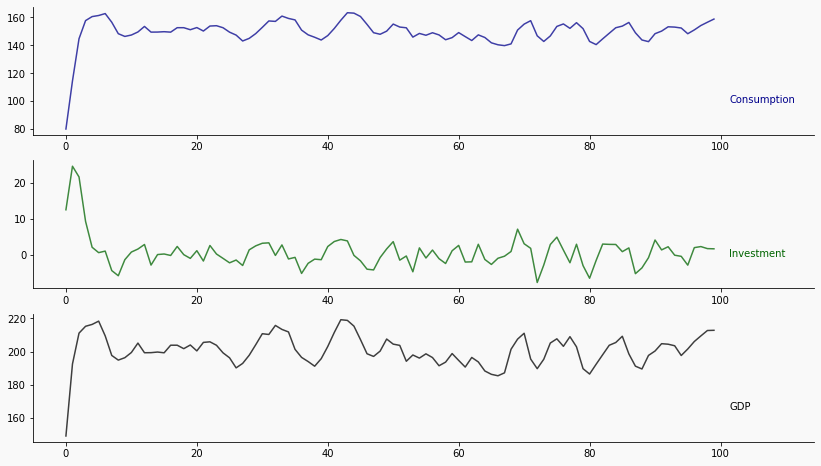

In [3]:
mod = Samuelson(a=0.7, b=0.5, σ=5.0)
c, i, y = mod.simulate(y0m1=100.0, y0m2=75.0, G=50.0, T=100)

mod.behavior()

mod.plot(c, i, y);

Two complex roots
Absolute values are less than one


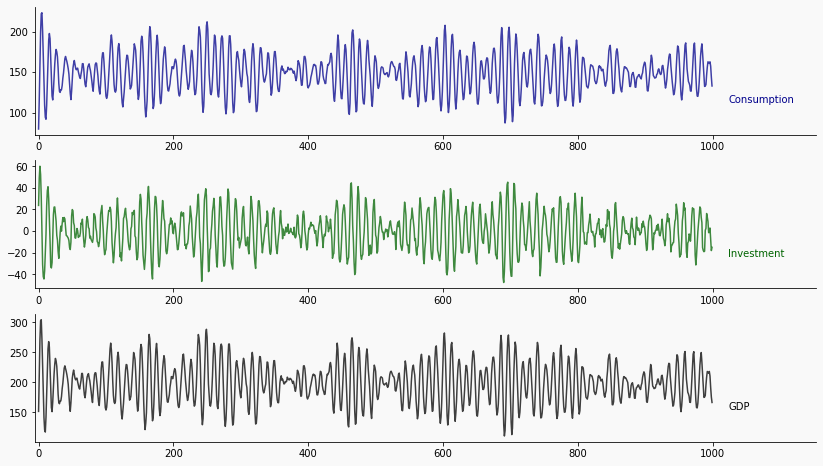

In [4]:
mod = Samuelson(a=0.7, b=0.95, σ=5.0)
c, i, y = mod.simulate(y0m1=100.0, y0m2=75.0, G=50.0, T=1_000)

mod.behavior()

mod.plot(c, i, y);

Two complex roots
Absolute values are equal to one


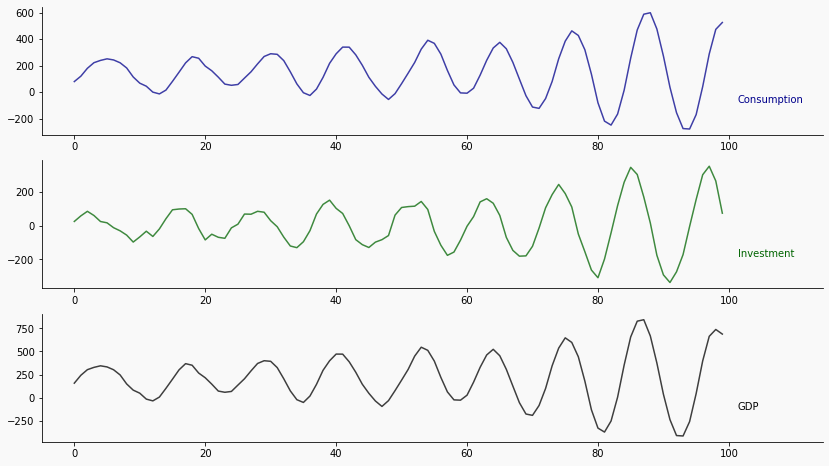

In [5]:
mod = Samuelson(a=0.7, b=1.0, σ=25.0)
c, i, y = mod.simulate(y0m1=100.0, y0m2=75.0, G=50.0, T=100)

mod.behavior()

mod.plot(c, i, y);

Two real roots
Absolute values are less than one


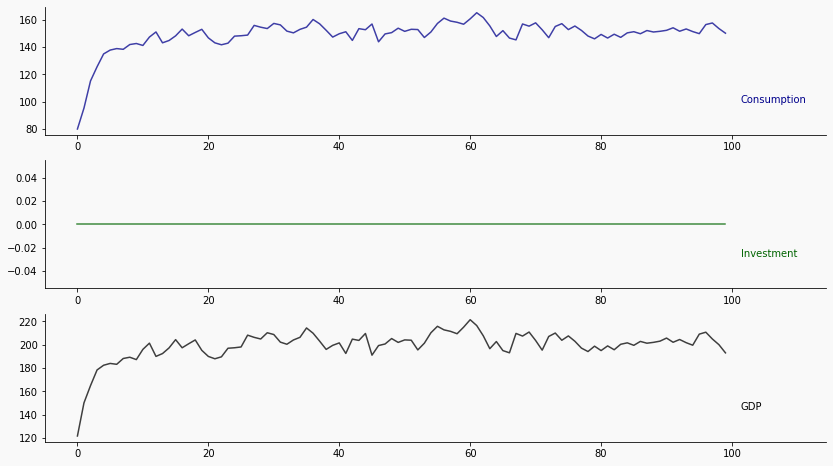

In [6]:
mod = Samuelson(a=0.7, b=0.0, σ=5.0)
c, i, y = mod.simulate(y0m1=100.0, y0m2=75.0, G=50.0, T=100)

mod.behavior()

mod.plot(c, i, y);

### What is an impulse response function?

An [impulse response](https://en.wikipedia.org/wiki/Impulse_response) originally comes from signal processing where they explored what happens to a dynamic system which received a brief input signal.

In economics (and other fields), we use it in a similar fashion -- We explore what happens in response to a single "shock" (exogenous change to our mathematical system).

One typically beings the system in the steady state prior to the exogenous change.

In this case, an IRF is the time-series of our endogenous variables, $\{C_t\}, \{I_t\}, \{Y_t\}$, given an exogenous shock which, in this case, will be,

$$\varepsilon_t = \begin{cases} 1.0 \quad \text{if } t=0 \\ 0.0 \quad \text{else}\end{cases}$$


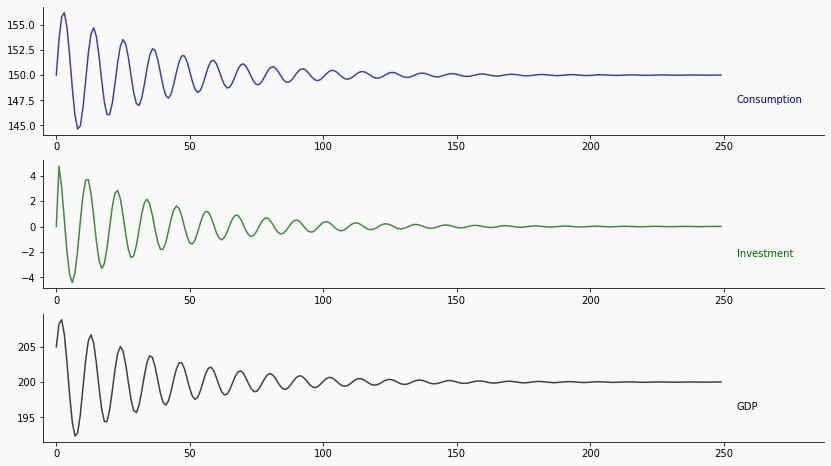

In [7]:
mod = Samuelson(a=0.7, b=0.95, σ=5.0)
G = 50.0
yss = mod.Y_ss(G)

c, i, y = mod.irf(y0m1=yss, y0m2=yss, G=G, T=250)

mod.plot(c, i, y);

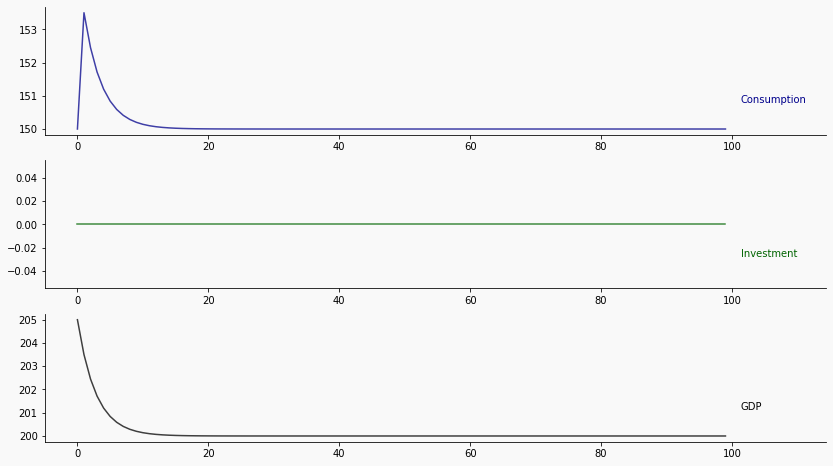

In [8]:
mod = Samuelson(a=0.7, b=0.0, σ=5.0)
G = 50.0
yss = mod.Y_ss(G)

c, i, y = mod.irf(y0m1=yss, y0m2=yss, G=G, T=100)

mod.plot(c, i, y);

## Government Spending

This function computes a response to either a permanent or one-off increase
in government expenditures

In [9]:
mod = Samuelson(a=0.7, b=.95, σ=5.0)

G_before = 50.0
G_after = 100.0
T_change = 50
T = 250

yss = mod.Y_ss(G)

A permanent government spending shock can be simulated as follows

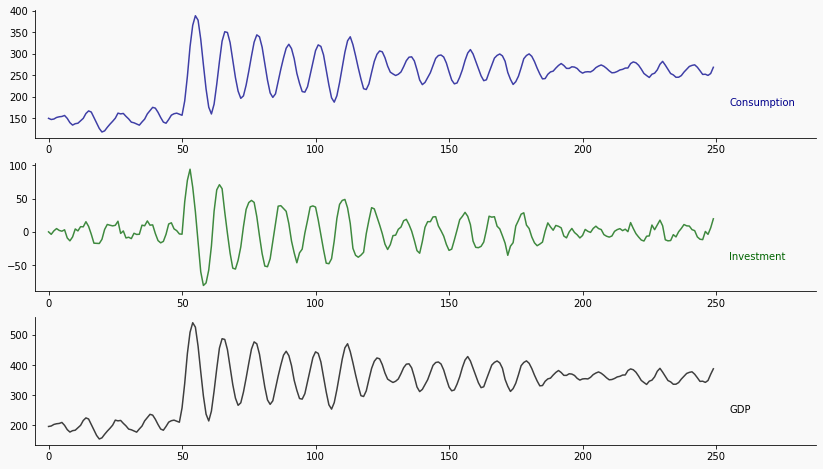

In [10]:
G_permanent = G_before*np.ones(T)
G_permanent[T_change:] = G_after

c, i, y = mod.simulate(yss, yss, G_permanent, T)

mod.plot(c, i, y);

We can also see the response to a one time jump in government expenditures

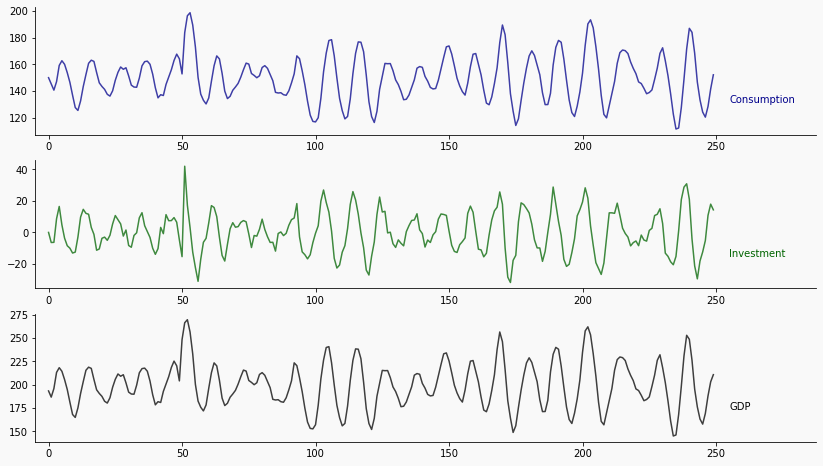

In [11]:
G_onetime = G_before*np.ones(T)
G_onetime[T_change] = G_after

c, i, y = mod.simulate(yss, yss, G_onetime, T)

mod.plot(c, i, y);